Основные статистические показатели

In [1]:
%matplotlib inline
import pandas as pd
import math

def getPercents(row):
    row['percent'] = row['sum_payouts_cat'] * 100 / allCatSum
    return row
def get_ratio(row):
    row['ratio'] = math.log(row['posts_count_cat'] / row['sum_payouts_cat'], 2) * -1
    return row

categories_df = pd.read_csv('./csv_data/week_2_all_with_cat.csv')
lower_tnan_one = pd.read_csv('./csv_data/lower_than_one.csv')
groupped_df = categories_df.groupby('cat')
grouped_values_df = pd.DataFrame()

grouped_values_df['sum_payouts'] = groupped_df['total_payout_value'].sum()
grouped_values_df['mean_pay'] = groupped_df['total_payout_value'].mean()
grouped_values_df['median_pay'] = groupped_df['total_payout_value'].median()
grouped_values_df['posts_count'] = groupped_df['permlink'].count()
grouped_values_df['authors_count'] = groupped_df['author'].nunique()

grouped_values_df = grouped_values_df.add_suffix('_cat').reset_index()
grouped_values_df = grouped_values_df.apply(get_ratio, axis=1)

allCatSum = grouped_values_df['sum_payouts_cat'].sum()
grouped_values_df = grouped_values_df.apply(getPercents, axis=1)
print(grouped_values_df)

grouped_values_df.add_suffix('_cat').reset_index().to_csv('./csv_data/week_2_counted_stats.csv', index=False)
# lower_than_one.to_csv('./csv_data/lower_than_one.csv', columns=['author', 'permlink', 'total_payout_value', 'created'])

                  cat  sum_payouts_cat  mean_pay_cat  median_pay_cat  \
0          Golosmedia       390446.776   5276.307784        5365.083   
1                 PSK       427501.307   3592.447958        1746.992   
2          Vox Populi       280449.322    599.250688         260.279   
3         Апвот 50-50      1138835.626    777.893187           0.070   
4  Независимые авторы       105925.145     13.650148           0.033   

   posts_count_cat  authors_count_cat      ratio    percent  
0               74                  5  12.365313  16.663270  
1              119                 58  11.810752  18.244663  
2              468                 39   9.227016  11.968860  
3             1464                256   9.603428  48.602593  
4             7760               1796   3.770845   4.520614  


<IPython.core.display.Javascript object>


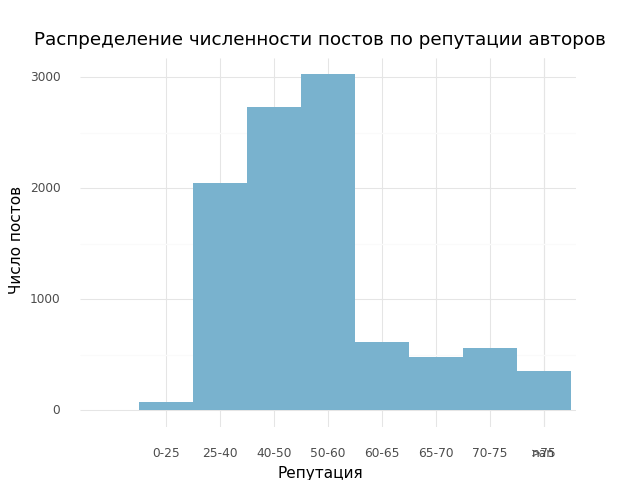

<ggplot: (-9223372036838811739)>

In [50]:
rep_groups_df = categories_df.groupby('rep_group').describe()

(ggplot(categories_df) + 
    aes(x='rep_group') +
    geom_histogram(binwidth=1,  fill="#79B2CE") + theme_minimal() +
    xlab('Репутация') + ylab('Число постов') + ggtitle('Распределение численности постов по репутации авторов'))

  rep_group   count         mean          std    min        25%        50%  \
0      0-25    72.0     0.001139     0.005803  0.000     0.0000     0.0000   
1     25-40  2050.0     0.045427     0.094678  0.000     0.0000     0.0000   
2     40-50  2730.0     0.247400     1.517516  0.000     0.0000     0.0200   
3     50-60  3024.0     2.888762    22.598916  0.000     0.0000     0.0680   
4     60-65   613.0    30.938881   220.788406  0.000     0.2260     1.7850   
5     65-70   477.0   669.607048  1716.766267  0.000    15.4340    67.5570   
6     70-75   562.0  1651.939548  2431.724360  0.211   163.8020   343.4485   
7       >75   159.0  4898.843107  2791.400392  0.000  3398.7535  5015.8160   

          75%        max  
0     0.00000      0.040  
1     0.06600      2.047  
2     0.09000     33.217  
3     0.34625    638.388  
4    19.99100   4893.057  
5   250.45700  10605.449  
6  2328.35875  10848.304  
7  7174.70300  10938.046  


<IPython.core.display.Javascript object>


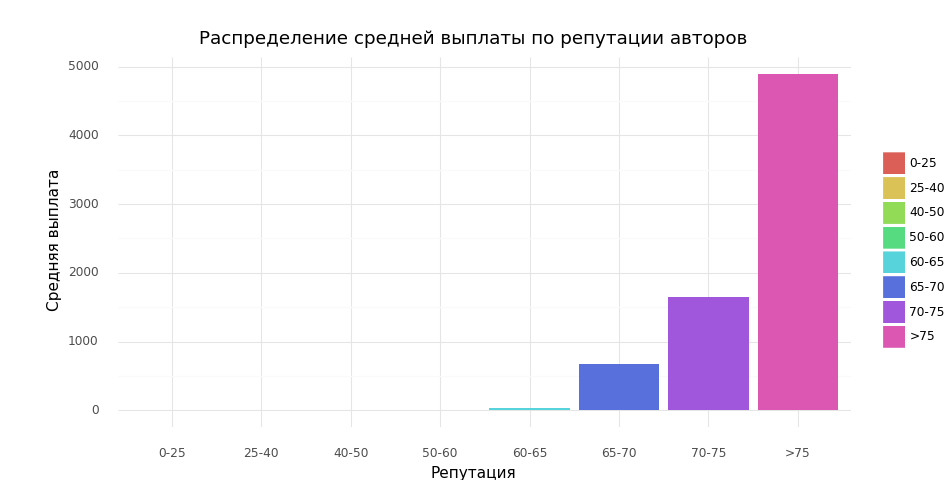

<ggplot: (16405049)>

In [57]:
print(rep_groups_df['author_pay'].reset_index())
(ggplot() + geom_bar(aes(y = 'mean', x = 'rep_group', fill = 'rep_group'), data = rep_groups_df['author_pay'].reset_index(), stat="identity") +
    theme_minimal() +
    xlab('Репутация') + ylab('Средняя выплата') +  labs(fill='') +
     ggtitle('Распределение средней выплаты по репутации авторов'))

  rep_group    sum_group   mean_group  median_group  max_group
0      0-25        0.082     0.001139         0.000      0.040
1     25-40      101.305     0.049417         0.000      2.058
2     40-50      912.564     0.334273         0.020     48.886
3     50-60    12106.592     4.003503         0.068    936.567
4     60-65    25801.264    42.090153         2.264   6870.886
5     65-70   373008.777   781.989050        84.945  10772.200
6     70-75  1078914.905  1919.777411       408.620  11178.919
7       >75   852305.540  5360.412201      5744.828  11370.795


<IPython.core.display.Javascript object>


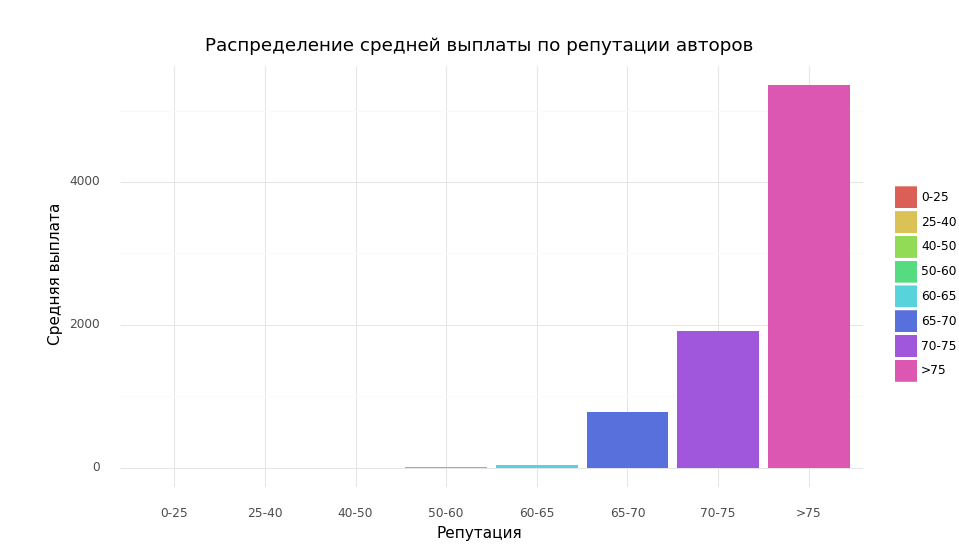

<ggplot: (17270792)>

In [42]:
from plotnine import *

categories_df = pd.read_csv('./csv_data/week_2_all_with_cat2.csv')
rep_groups = categories_df.groupby('rep_group')
grouped_values_df = pd.DataFrame()

grouped_values_df['sum'] = rep_groups['total_payout_value'].sum()
grouped_values_df['mean'] = rep_groups['total_payout_value'].mean()
grouped_values_df['median'] = rep_groups['total_payout_value'].median()
grouped_values_df['max'] = rep_groups['total_payout_value'].max()
grouped_values_df = grouped_values_df.add_suffix('_group').reset_index()

print(grouped_values_df)
(ggplot() + geom_bar(aes(y = 'mean_group', x = 'rep_group', fill = 'rep_group'), data = grouped_values_df, stat="identity") +
    theme_minimal() +
    xlab('Репутация') + ylab('Средняя выплата') +  labs(fill='') +
     ggtitle('Распределение средней выплаты по репутации авторов'))


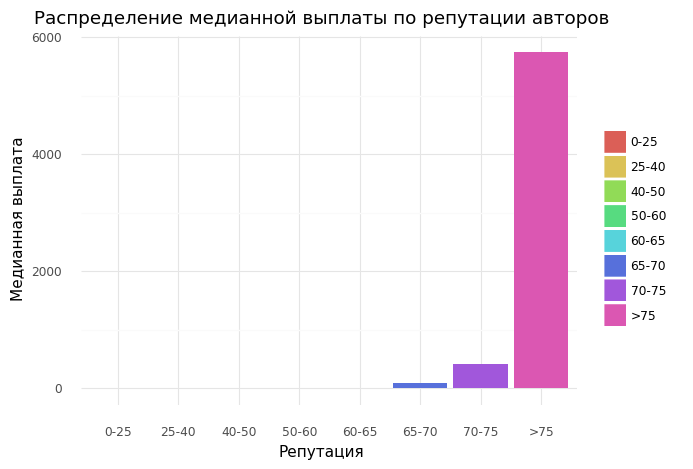

<ggplot: (-9223372036832714601)>

In [55]:
(ggplot() + geom_bar(aes(y = 'median_group', x = 'rep_group', fill = 'rep_group'), data = grouped_values_df, stat="identity") +
    theme_minimal() +
    xlab('Репутация') + ylab('Медианная выплата') +  labs(fill='') +
     ggtitle('Распределение медианной выплаты по репутации авторов'))

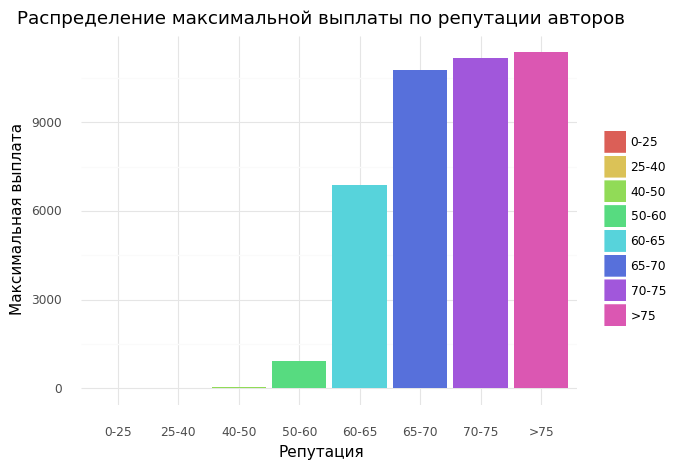

<ggplot: (-9223372036833640139)>

In [57]:
(ggplot() + geom_bar(aes(y = 'max_group', x = 'rep_group', fill = 'rep_group'), data = grouped_values_df, stat="identity") +
    theme_minimal() +
    xlab('Репутация') + ylab('Максимальная выплата') + 
     ggtitle('Распределение максимальной выплаты по репутации авторов') + labs(fill=''))

      Категория  Количество постов    Процент
0  Меньше 1 GBG               7742  78.320688
1  Больше 1 GBG               2143  21.679312


<IPython.core.display.Javascript object>


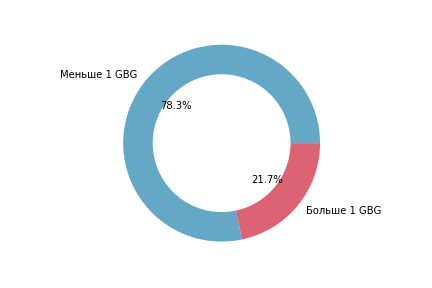

In [26]:
import matplotlib.pyplot as plt

%matplotlib notebook

def perc(row):
    row['Процент'] = row['Количество постов'] * 100 / categories_df.shape[0]
    return row
lower_than_one = categories_df.drop(categories_df[categories_df.total_payout_value > 1].index)
amount_data = [['Меньше 1 GBG', lower_than_one.shape[0]], ['Больше 1 GBG', categories_df.shape[0] - lower_than_one.shape[0]]]
amount_df = pd.DataFrame(amount_data, columns=['Категория', 'Количество постов'])
amount_df = amount_df.apply(perc, axis=1)
print(amount_df)

colors = ['#65A8C5', '#DB6374', 'lightskyblue', 'lightcoral', '#B5CCD4']

plt.pie(amount_df['Количество постов'], labels=amount_df['Категория'], colors=colors,
        autopct='%1.1f%%')

centre_circle = plt.Circle((0,0),0.7, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show() 
plt.savefig("./plots/01_lower_than_one.svg", format="svg")

Сумма выплат за неделю, распределенная по категориям. 

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', '#B5CCD4']


plt.pie(grouped_values_df['posts_count_cat'], labels=grouped_values_df['cat'], colors=colors)
centre_circle = plt.Circle((0,0),0.65, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()

NameError: name 'grouped_values_df' is not defined

Процент от суммы выплат за день, распределенный по категориям

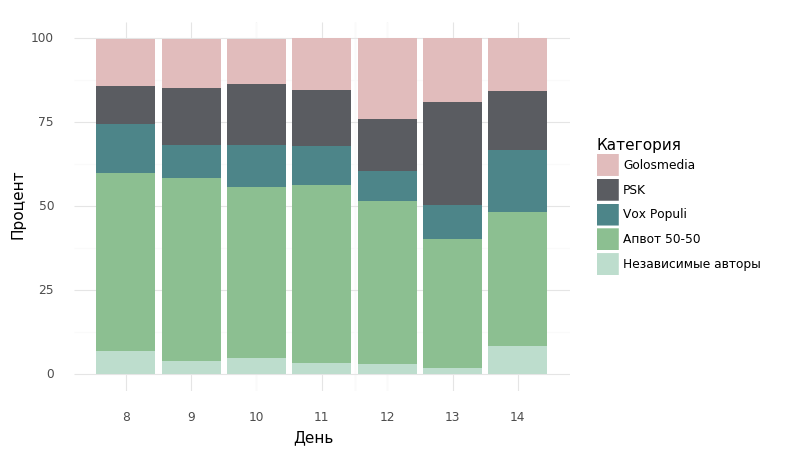

<ggplot: (14777499)>

In [44]:
from plotnine import *

(ggplot() + geom_bar(aes(y = 'percent', x = 'day', fill = 'cat'), data = categories_df, stat="identity") +
     scale_x_continuous(breaks = categories_df['day'].unique()) +
     scale_fill_manual(['#E1BCBC', '#5A5C61', '#4D8589', '#8CBF91', '#BDDDCD']) +
    xlab('День') + ylab('Процент') + ggtitle('') + labs(fill='Категория') + theme_minimal())

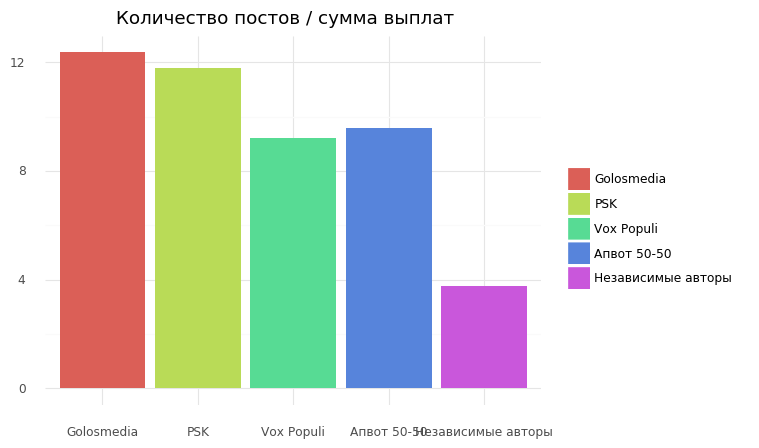

<ggplot: (21106089)>

In [72]:
(ggplot() + geom_bar(aes(y = 'ratio', x = 'cat', fill = 'cat'), data = grouped_values_df, stat="identity") +
    theme_minimal() +
    xlab('') + ylab('') + 
     ggtitle('Количество постов / сумма выплат') + labs(fill=''))